In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix, accuracy_score
import random
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("wine.data", sep=",", encoding="utf-8", header=None)
cl1_idx, cl2_idx, cl3_idx = map(lambda el : el[1].index, df.groupby(0))
df_noclass = df.drop([0], axis="columns")

class1 = df_noclass.iloc[cl1_idx]
class2 = df_noclass.iloc[cl2_idx]
class3 = df_noclass.iloc[cl3_idx]



Для набора wine.data применить ЛДА (n=2). Найти величину объясняемой дисперсии. Нарисовать график рассеяния одной компоненты от другой.

In [ ]:

lda = LDA(n_components=2, store_covariance=True, solver="eigen")
lda_result = lda.fit_transform(df_noclass, df[0])

fig,ax = plt.subplots(1)
ax.set_facecolor([0.207, 0.205, 0.204])
ax.scatter(lda_result[cl1_idx, 0], lda_result[cl1_idx, 1], color="g")
ax.scatter(lda_result[cl2_idx, 0], lda_result[cl2_idx, 1], color="cyan")
ax.scatter(lda_result[cl3_idx, 0], lda_result[cl3_idx, 1], color="m")

print(lda.explained_variance_ratio_)
plt.show()
plt.clf()

Аналогично для PCA

In [ ]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_noclass, df[0])
fig,ax = plt.subplots(1)
ax.set_facecolor([0.207, 0.205, 0.204])
ax.scatter(pca_result[cl1_idx, 0], pca_result[cl1_idx, 1], color="g")
ax.scatter(pca_result[cl2_idx, 0], pca_result[cl2_idx, 1], color="cyan")
ax.scatter(pca_result[cl3_idx, 0], pca_result[cl3_idx, 1], color="m")

print(pca.explained_variance_ratio_)
plt.show()


In [ ]:
model_baseline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GaussianNB)
])
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=123)

Применить наивный байесовский классификатор к результатам ЛДА.

score = 1.0


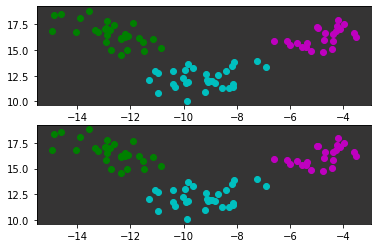

In [74]:
nb = GaussianNB()
rand_idx = [random.randint(0, len(df) - 1) for i in range(int(len(df) * 0.8))]
# print(rand_idx)
nb.fit(lda_result[rand_idx], df.iloc[rand_idx][0])
idxs = [i for i in df.index if not i in rand_idx]
predicted, actual = nb.predict(lda_result[idxs]),  df.iloc[idxs][0] 
# plot_confusion_matrix(nb, lda_result[idxs], df.iloc[idxs][0])
print("score = " + str(accuracy_score(actual, predicted, normalize=False)/ len(idxs)))

fig, ax = plt.subplots(2)
ax[0].set_facecolor([0.207, 0.205, 0.204])
ax[1].set_facecolor([0.207, 0.205, 0.204])

for i in range(len(predicted)):
    if(predicted[i] == 1):
        color = 'g'
    elif(predicted[i] == 2):
        color = 'c'
    elif(predicted[i] == 3):
        color = 'm'
    ax[0].scatter(lda_result[idxs][i,0], lda_result[idxs][i,1], color=color)

ax[1].scatter(lda_result[[i for i in cl1_idx if i in idxs], 0], lda_result[[i for i in cl1_idx if i in idxs], 1], color = 'g')
ax[1].scatter(lda_result[[i for i in cl2_idx if i in idxs], 0], lda_result[[i for i in cl2_idx if i in idxs], 1], color = 'c')
ax[1].scatter(lda_result[[i for i in cl3_idx if i in idxs], 0], lda_result[[i for i in cl3_idx if i in idxs], 1], color = 'm')
plt.show()
# print(cross_val_score(model_baseline, df_noclass.iloc[idxs], df.iloc[idxs][0], scoring='accuracy', cv=cv)).mean()

Задание. Для набора wine.data применить классификатор k-ближайших соседей. Найти оптимальное значение k.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

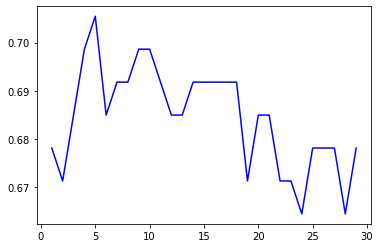

In [71]:
full_idx = list(range(len(df)))
random.shuffle(full_idx)
# rand_idx = [full_idx.pop(0) for i in range(int(len(df) * 0.8))]
# idxs = [i for i in df.index if not i in rand_idx]

# print(rand_idx)
score = [[], []]

for i in range(1,30):
    nn = KNeighborsClassifier(n_neighbors = i)
    nn.fit(df_noclass.iloc[rand_idx], df.iloc[rand_idx][0])
    predicted, actual = nn.predict(df_noclass.iloc[idxs]),  df.iloc[idxs][0] 

    # plot_confusion_matrix(nn, df_noclass.iloc[idxs], df.iloc[idxs][0])
    score[1].append(accuracy_score(actual, predicted, normalize=False)/ len(idxs))
    score[0].append(i)
    # print("score = " + str(score))
    # print(accuracy_score(actual, predicted, normalize=False)/ len(idxs))
    # print(nn.score(actual, predicted))
plt.plot(score[0], score[1], color = "b")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [76]:
vq = KMeans(n_clusters=3, n_init=50)
vq.fit_transform(df_noclass.iloc[rand_idx], df.iloc[rand_idx][0])
predicted, actual = nn.predict(df_noclass.iloc[idxs]),  df.iloc[idxs][0]

print(predicted)
cen = vq.cluster_centers_[:, 0:2]
plt.scatter(vq.cluster_centers_[0,0], k_means.cluster_centers[0,1], s=200, color = 'g')
plt.scatter(vq.cluster_centers_[1,0], k_means.cluster_centers[1,1], s=200, color = 'c')
plt.scatter(vq.cluster_centers_[2,0], k_means.cluster_centers[2,1], s=200, color = 'm')

[1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 2 1 1 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 1]
[[13.01857143  2.43061224]
 [13.76052632  1.86789474]
 [12.466       2.47854545]]
